In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cPickle
import pandas as pd
import gzip

In [102]:
# Load dataset
data=gzip.open("/home/iyer/Downloads/mnist.pkl.gz")
train_data,validation_data,test_data=cPickle.load(data,encoding="latin1")

In [103]:
def relu(Z):
    res=(Z+np.abs(Z))/2
    return res


In [104]:
def relu_backward(Z):
    res=(Z+np.abs(Z))/(2*np.abs(Z))
    return res


In [105]:
def softmax(Z):
    res=np.exp(Z)
    result=res/np.sum(res,axis=0,keepdims=True)
    return result

In [106]:
def initialise_parameters(layer_dims):
    parameters={}
    L=len(layer_dims)-1
    for l in range(1,L+1):
        parameters["W"+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b"+str(l)]=np.zeros((layer_dims[l],1))
    return parameters


In [169]:
def forward_propagation(X,parameters):
    cache={}
    L=len(layer_dims)-1
    A_prev=X
    for l in range(1,L):
        Z=parameters["W"+str(l)].dot(A_prev)+parameters["b"+str(l)]
        A=relu(Z)
        cache["Z"+str(l)]=Z
        A_prev=A
    Z = parameters["W" + str(L)].dot(A_prev) + parameters["b" + str(L)]
    AL=softmax(Z)
    cache["Z"+str(L)]=Z
    return AL,cache
    

In [170]:
def compute_cost(Y,AL):
    m=AL.shape[1]
    cost=(np.sum(-(Y*np.log(AL))))/m
    return cost

In [171]:

def backward_propagation(X,Y,cache,AL,parameters,layer_dims):
    m = X.shape[1]
    dparameters = {}
    L = len(layer_dims) - 1
    dZ = AL - Y
    dparameters["dW" + str(L)] = dZ.dot(relu(cache["Z" + str(L-1)]).transpose())/m
    dparameters["db" + str(L)] = np.sum(dZ,axis = 1,keepdims = True)/m
    for l in range(1,L):
        dZ = ((parameters["W" + str(L-l+1)].transpose()).dot(dZ)) * (relu_backward(cache["Z" + str(L-l)]))
        if L-l-1 != 0:
            dparameters["dW" + str(L-l)] = dZ.dot(relu(cache["Z" + str(L-1-l)]).transpose())/m
        else:
            dparameters["dW" + str(L-l)] = dZ.dot(X.transpose())/m
        dparameters["db" + str(L-l)] = np.sum(dZ,axis = 1,keepdims = True)/m
    return dparameters  


    

In [188]:
def update_parameters(parameters,dparameters,layer_dims,learning_rate):
    L=len(layer_dims)-1
    for l in range(1,L+1):
        parameters["W"+str(l)]=parameters["W"+str(l)]-learning_rate*dparameters["dW"+str(l)]
        parameters["b"+str(l)]=parameters["b"+str(l)]-learning_rate*dparameters["db"+str(l)]
    return parameters

In [196]:
def accuracy(AL,YNum):
    a=np.argmax(AL,axis=0)
    a=a.reshape(1,YNum.shape[1])
    cnt=0
    for i in range(YNum.shape[1]):
        if a[0,i]==YNum[0,i]:
            cnt=cnt+1
    return (cnt/YNum.shape[1])

In [197]:
def learn(X,X_test,Y,Y_test,YNum,YNum_test,layer_dims,learning_rate,num_episodes):
    costs=[]
    costs_test=[]
    accs=[]
    accs_test=[]
    parameters=initialise_parameters(layer_dims)
    for i in range(num_episodes):
        AL,cache=forward_propagation(X,parameters)
        AL_test,cache_test=forward_propagation(X_test,parameters)
        dparameters=backward_propagation(X,Y,cache,AL,parameters,layer_dims)
        parameters=update_parameters(parameters,dparameters,layer_dims,learning_rate)
        cost=compute_cost(Y,AL)
        cost_test=compute_cost(Y_test,AL_test)
        costs.append(cost)
        costs_test.append(cost_test)
        accs.append(100*accuracy(AL,YNum))
        accs_test.append(100*accuracy(AL_test,YNum_test))
        if i%10==0:
            print("Iterations : ", i)
            print("Tr_Acc : ", accs[i], "Test_Acc : ", accs_test[i])
            print("Tr_Cost : ", costs[i], "Test_Cost : ", costs_test[i])
    return parameters, costs, accs, costs_test, accs_test
    

In [198]:
X=train_data[0]
X=X.T
print("X Shape:=",X.shape)
   

X Shape:= (784, 50000)


In [199]:
n_X=X.shape[0]
m=X.shape[1]
YNum=train_data[1]
print(YNum.shape)
YNum=YNum.reshape(1,YNum.shape[0])
print(YNum.shape)

(50000,)
(1, 50000)


In [200]:
X_test=test_data[0]
X_test=X_test.T
print(X_test.shape)
m_test = X_test.shape[1]
YNum_test=test_data[1]
print(YNum_test.shape)
YNum_test=YNum_test.reshape((1,YNum_test.shape[0]))
print(YNum_test.shape)

(784, 10000)
(10000,)
(1, 10000)


In [201]:
Y = np.zeros((10,m))
for i in range(m):
    Y[int(YNum[0,i]),i]=1
    
Y_test=np.zeros((10,m_test))
for i in range(m_test):
    Y_test[int(YNum_test[0,i]),i]=1

    


In [202]:
layer_dims = [784,120,10]
parameters, costs, accs, costs_test, accs_test = learn(X, X_test, Y, Y_test, YNum, YNum_test, layer_dims, 0.4, 1000)

Iterations :  0
Tr_Acc :  10.202 Test_Acc :  10.37
Tr_Cost :  2.30129832464 Test_Cost :  2.30134682902
Iterations :  10
Tr_Acc :  50.864 Test_Acc :  51.05
Tr_Cost :  2.16624768504 Test_Cost :  2.16322526227
Iterations :  20
Tr_Acc :  71.426 Test_Acc :  72.5
Tr_Cost :  1.36565939014 Test_Cost :  1.34678632989
Iterations :  30
Tr_Acc :  80.538 Test_Acc :  81.11
Tr_Cost :  0.812393270529 Test_Cost :  0.789043087228
Iterations :  40
Tr_Acc :  84.47200000000001 Test_Acc :  85.22
Tr_Cost :  0.614442052185 Test_Cost :  0.589923723823
Iterations :  50
Tr_Acc :  83.39 Test_Acc :  83.84
Tr_Cost :  0.579139759852 Test_Cost :  0.554710081496
Iterations :  60
Tr_Acc :  85.72 Test_Acc :  86.3
Tr_Cost :  0.489763622006 Test_Cost :  0.467596515419
Iterations :  70
Tr_Acc :  86.134 Test_Acc :  86.53999999999999
Tr_Cost :  0.461490464103 Test_Cost :  0.44258076532
Iterations :  80
Tr_Acc :  87.78200000000001 Test_Acc :  88.2
Tr_Cost :  0.42427935505 Test_Cost :  0.405601027525
Iterations :  90
Tr_Acc : 

Iterations :  740
Tr_Acc :  95.824 Test_Acc :  95.53
Tr_Cost :  0.148112070019 Test_Cost :  0.154280500102
Iterations :  750
Tr_Acc :  95.864 Test_Acc :  95.58
Tr_Cost :  0.146664164801 Test_Cost :  0.153069074633
Iterations :  760
Tr_Acc :  95.894 Test_Acc :  95.6
Tr_Cost :  0.145233775133 Test_Cost :  0.151869095105
Iterations :  770
Tr_Acc :  95.944 Test_Acc :  95.62
Tr_Cost :  0.143827073184 Test_Cost :  0.150683839891
Iterations :  780
Tr_Acc :  95.98 Test_Acc :  95.63000000000001
Tr_Cost :  0.142445565448 Test_Cost :  0.149524145765
Iterations :  790
Tr_Acc :  96.028 Test_Acc :  95.65
Tr_Cost :  0.141087036839 Test_Cost :  0.148388136748
Iterations :  800
Tr_Acc :  96.05799999999999 Test_Acc :  95.7
Tr_Cost :  0.139751270511 Test_Cost :  0.147274961808
Iterations :  810
Tr_Acc :  96.09 Test_Acc :  95.72
Tr_Cost :  0.138434870588 Test_Cost :  0.14618303717
Iterations :  820
Tr_Acc :  96.136 Test_Acc :  95.76
Tr_Cost :  0.137142792728 Test_Cost :  0.145108502301
Iterations :  830
T

In [230]:
"""fig=plt.figure()
fig.suptitle('Learning curve')
plt.xlabel("Number of Iterations")
for i in range(len(accs)):
    accs[i]=float(accs[i]/100)
    accs_test[i]=float(accs_test[i]/100)
plt.plot(costs,label='Training Cost')
plt.plot(accs,label='Training Accuracy')
plt.plot(costs_test,label='Test Cost')
plt.plot(accs_test,label='Test Accuracy')
plt.legend()
plt.savefig('Learningcurve.png')
"""


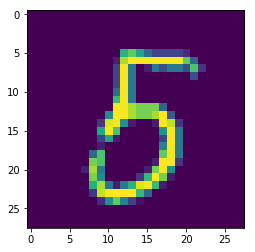

The number is :- 5


In [240]:
index=45
x=X_test[:,index].reshape(784,1)
img=x.reshape(28,28)
plt.imshow(img)
plt.show()
A,Z=forward_propagation(x,parameters)
print("The number is :-",np.argmax(A))